## Temp

In [2]:
import pandas as pd
import seaborn as sn


In [48]:
df = pd.read_csv('data/20-10-21/R1L1-S3-data.csv')
df = df[df['status'] == 'normal']
df

# df.voltage.quantile([0.25,0.5,0.75])

,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,20/08/2021,02:27:04,-3,226,226,226,1,1,1,...,1,1,1,49,50,50,1,1,1,normal
1,1,20/08/2021,02:27:25,-3,228,227,228,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
2,2,20/08/2021,02:27:58,-3,228,228,228,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
3,3,20/08/2021,02:28:08,0,227,227,227,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
4,4,20/08/2021,02:28:19,0,227,227,227,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71862,71862,14/10/2021,23:05:56,0,0,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,1,1,1,normal
71988,71988,14/10/2021,23:59:16,0,-1,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,1,1,1,normal
72062,72062,14/10/2021,00:29:54,0,-1,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,1,1,1,normal
72269,72269,14/10/2021,01:57:14,0,-1,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,1,1,1,normal


In [49]:
# def clean(df):
df_temp =  df[['date','time','temperature']]	
df_temp = df_temp[df_temp['temperature'] > 1]
df_temp = df_temp[df_temp['temperature'] <= 100]
df_temp = df_temp[(df_temp['temperature'] >= 20) & (df_temp['temperature'] <= 100)]
df_temp

,date,time,temperature


array([[<AxesSubplot:title={'center':'temperature'}>]], dtype=object)

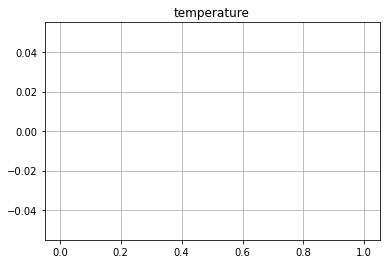

In [50]:
df_temp[['temperature']].hist(bins =100)

In [51]:
q25,q75 = df_temp['temperature'].quantile([0.25,0.75])
q5,q95 = df_temp['temperature'].quantile([0.05,0.95])

In [44]:
iqr = q75 - q25
print(q75, q25,iqr*1.5)



nan nan nan


In [38]:
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print('emergency = {0},{1}'.format(lower_temp, upper_temp))

emergency = 18.5,54.5


In [39]:
print('warning = {0},{1}'.format(q5,q95))

warning = 26.0,43.0


## Vol

In [147]:
import pandas as pd

In [171]:
df = pd.read_csv('data/20-10-21/R1L1-S3-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]

df


,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,20/08/2021,02:27:04,-3,226,226,226,1,1,1,...,1,1,1,49,50,50,1,1,1,normal
1,1,20/08/2021,02:27:25,-3,228,227,228,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
2,2,20/08/2021,02:27:58,-3,228,228,228,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
3,3,20/08/2021,02:28:08,0,227,227,227,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
4,4,20/08/2021,02:28:19,0,227,227,227,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71862,71862,14/10/2021,23:05:56,0,0,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,1,1,1,normal
71988,71988,14/10/2021,23:59:16,0,-1,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,1,1,1,normal
72062,72062,14/10/2021,00:29:54,0,-1,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,1,1,1,normal
72269,72269,14/10/2021,01:57:14,0,-1,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,1,1,1,normal


In [172]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'temperature', 'voltage_1', 'voltage_2',
       'voltage_3', 'voltage_4', 'voltage_5', 'voltage_6', 'current_1',
       'current_2', 'current_3', 'current_4', 'current_5', 'current_6', 'pf_1',
       'pf_2', 'pf_3', 'pf_4', 'pf_5', 'pf_6', 'frequency_1', 'frequency_2',
       'frequency_3', 'frequency_4', 'frequency_5', 'frequency_6', 'status'],
      dtype='object')

In [180]:
# def clean(df):
focus = 'voltage_3'
df_temp =  df[['date','time', focus]]	
df_temp = df_temp[df_temp[focus] > 200]
df_temp = df_temp[df_temp[focus] <= 300]
# df_temp = df_temp[(df_temp['voltage'] >= 20) & (df_temp['voltage'] <= 50)]
df_temp

,date,time,voltage_3
0,20/08/2021,02:27:04,226
1,20/08/2021,02:27:25,228
2,20/08/2021,02:27:58,228
3,20/08/2021,02:28:08,227
4,20/08/2021,02:28:19,227
...,...,...,...
70834,14/10/2021,15:52:44,237
70835,14/10/2021,15:52:55,238
70836,14/10/2021,15:53:07,238
70837,14/10/2021,15:53:18,238


array([[<AxesSubplot:title={'center':'voltage_3'}>]], dtype=object)

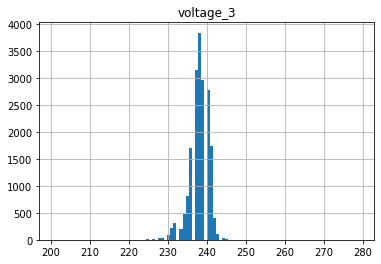

In [181]:
df_temp[[focus]].hist(bins =100)

In [182]:
q25,q75 = df_temp[focus].quantile([0.25,0.75])
q5,q95 = df_temp[focus].quantile([0.05,0.95])

iqr = q75 - q25
lower_temp = q25 - (3*iqr)
upper_temp = q75 + (3*iqr)
print('Emergency: {0},{1}'.format(lower_temp, upper_temp))
print('Warning: {0},{1}'.format(q5,q95))

Emergency: 228.0,249.0


In [183]:
# q25,q75 = df_temp[focus].quantile([0.25,0.75])
# q5,q95 = df_temp[focus].quantile([0.05,0.95])

# iqr = q75 - q25
# lower_temp = q25 - (3*iqr)
# upper_temp = q75 + (3*iqr)
# print('Emergency: {0},{1}'.format(lower_temp, upper_temp))
# print('Warning: {0},{1}'.format(q5,q95))

## curent

In [1]:
import pandas as pd

In [425]:
df = pd.read_csv('data/20-10-21/R1L1-J2-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]
df

,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,19/08/2021,02:31:39,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,normal
1,1,19/08/2021,02:31:52,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,normal
2,2,20/08/2021,03:24:44,22,225,225,227,225,226,226,...,0,0,0,50,50,50,50,50,50,normal
3,3,20/08/2021,03:25:19,23,225,225,227,225,225,225,...,0,0,0,49,49,50,49,50,50,normal
4,4,03/09/2021,08:49:44,0,3979,9,9,236,240,239,...,0,0,0,0,474,232,49,49,50,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60432,60432,14/10/2021,15:46:47,36,237,239,239,236,238,237,...,0,0,0,50,50,50,50,50,50,normal
60433,60433,14/10/2021,15:46:59,34,237,239,239,236,238,237,...,0,0,0,50,50,50,50,50,50,normal
60434,60434,14/10/2021,15:47:11,34,237,239,239,235,238,237,...,0,0,0,50,49,49,49,50,50,normal
61295,61295,14/10/2021,22:29:11,35,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


In [426]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'temperature', 'voltage_1', 'voltage_2',
       'voltage_3', 'voltage_4', 'voltage_5', 'voltage_6', 'current_1',
       'current_2', 'current_3', 'current_4', 'current_5', 'current_6', 'pf_1',
       'pf_2', 'pf_3', 'pf_4', 'pf_5', 'pf_6', 'frequency_1', 'frequency_2',
       'frequency_3', 'frequency_4', 'frequency_5', 'frequency_6', 'status'],
      dtype='object')

In [428]:
# def clean(df):
focus = 'current_5'
df_focus =  df[['date','time', focus]]	

df_focus = df_focus[df_focus[focus] > 0]
df_focus = df_focus[df_focus[focus] < 100]

# df_focus = df_focus[df_focus[focus] > 60]
# df_focus = df_focus[df_focus[focus] == 0]

# df_focus = df[(df[focus] >= _1) & (df[focus] <= 1)]
df_focus

,date,time,current_5
0,19/08/2021,02:31:39,1
1,19/08/2021,02:31:52,1
4,03/09/2021,08:49:44,20
5,03/09/2021,08:49:55,20
6,03/09/2021,08:50:19,20
...,...,...,...
60430,14/10/2021,15:46:01,3
60431,14/10/2021,15:46:24,2
60432,14/10/2021,15:46:47,2
60433,14/10/2021,15:46:59,2


array([[<AxesSubplot:title={'center':'current_5'}>]], dtype=object)

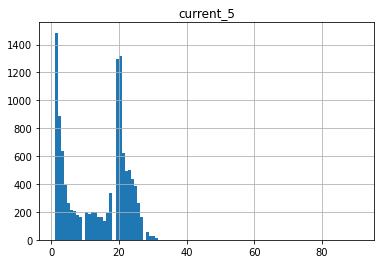

In [429]:
df_focus[[focus]].hist(bins = 100)

In [430]:
q25,q75 = df_focus[focus].quantile([0.25,0.75])
q2,q98 = df_focus[focus].quantile([0.02,0.98])

iqr = q75 - q25
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print('critical: {0},{1}'.format(lower_temp, upper_temp))
print('alert: {0},{1}'.format(q2,q98))

critical: -24.0,48.0
alert: 1.0,27.0


In [424]:
q1,q99 = df_focus[focus].quantile([0.01,0.99])
print('critical: {0},{1}'.format(q1,q99))

critical: 9.0,11.0


# pf

In [711]:
import pandas as pd

In [755]:
df = pd.read_csv('data/R1L1_J3_data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]
df

,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,20/08/2021,00:08:08,28,227,227,227,227,227,227,...,0,0,0,50,50,50,50,50,50,normal
1,1,20/08/2021,00:08:41,28,227,226,227,228,228,228,...,0,0,0,49,50,50,49,49,49,normal
2,2,20/08/2021,00:08:53,28,227,227,227,227,227,227,...,0,0,0,49,49,50,49,49,49,normal
3,3,20/08/2021,00:09:04,28,227,227,228,227,227,227,...,0,0,0,49,49,49,50,49,50,normal
4,4,20/08/2021,00:09:27,28,228,227,228,227,227,228,...,0,0,0,50,49,49,50,50,50,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,03/09/2021,09:58:18,41,238,238,240,237,239,241,...,0,0,0,50,50,50,50,50,50,normal
300,300,03/09/2021,10:06:37,49,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
483,483,03/09/2021,11:30:15,50,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
876,876,03/09/2021,14:52:31,43,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


In [756]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'temperature', 'voltage_1', 'voltage_2',
       'voltage_3', 'voltage_4', 'voltage_5', 'voltage_6', 'current_1',
       'current_2', 'current_3', 'current_4', 'current_5', 'current_6', 'pf_1',
       'pf_2', 'pf_3', 'pf_4', 'pf_5', 'pf_6', 'frequency_1', 'frequency_2',
       'frequency_3', 'frequency_4', 'frequency_5', 'frequency_6', 'status'],
      dtype='object')

In [757]:
# def clean(df):
focus = 'frequency_3'
df_focus =  df[['date','time', focus]]	
df_focus = df_focus[df_focus[focus] > 10]
df_focus = df_focus[df_focus[focus] < 100]
# df_temp = df_temp[(df_temp['voltage'] >= 20) & (df_temp['voltage'] <= 50)]
df_focus

,date,time,frequency_3
0,20/08/2021,00:08:08,50
1,20/08/2021,00:08:41,50
2,20/08/2021,00:08:53,50
3,20/08/2021,00:09:04,49
4,20/08/2021,00:09:27,49
...,...,...,...
278,03/09/2021,09:56:34,50
279,03/09/2021,09:56:46,50
280,03/09/2021,09:56:57,50
281,03/09/2021,09:58:07,49


array([[<AxesSubplot:title={'center':'frequency_3'}>]], dtype=object)

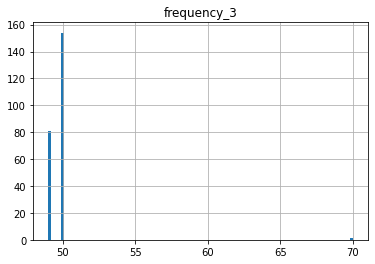

In [758]:
df_focus[[focus]].hist(bins =100)

# read CSV

In [431]:
import pandas as pd

In [432]:
df = pd.read_excel('data/20-10-21/threshold_all.xlsx')
df

,Machine,Vol1_warning,Vol2_warning,Vol3_warning,Vol4_warning,Vol5_warning,Vol6_warning,Cur1_warning,Cur2_warning,Cur3_warning,...,Vol4_emergency,Vol5_emergency,Vol6_emergency,Cur1_emergency,Cur2_emergency,Cur3_emergency,Cur4_emergency,Cur5_emergency,Cur6_emergency,temp_emergency
0,R1L1-J2,"233.0,241.0","236.0,244.0","236.0,244.0","232.0,239.0","236.0,243.0","234.0,241.0","18.0,27.0",NaN,"15.0,25.0",...,"229.0,243.0","229.0,250.0","227.0,248.0","13.0,29.0",NaN,"11.0,27.0","9.0,25.0","0.0,29.0","9.0,25.0","25.5,45.5"
1,R1L1-J3,"234.0,241.0","233.0,241.0","236.0,243.0","233.0,240.0","234.0,242.0","237.0,244.0","14.0,52.0","14.0,52.0","15.0,52.0",...,"230.0,244.0","228.0,249.0","230.0,251.0","13.0,55.0","13.0,56.0","14.0,56.0","14.0,57.0","2.0,30.0","15.0,57.0","17.0,49.0"
2,R1L1-R1,"236.0,243.0","233.0,241.0","233.0,242.0","231.0,241.0","235.0,243.0","232.0,240.0","42.0,94.0","34.0,91.0","41.0,90.0",...,"227.0,248.0","229.0,250.0","226.0,247.0","34.5,99.0","22.5,92.0","34.5,97.5","24.0,91.0","33.5,102.0","34.5,99.0","18.5,54.5"
3,R1L1-S1,"236.0,242.0","233.0,240.0","234.0,241.0",NaN,NaN,NaN,NaN,NaN,"6.0,9.0",...,NaN,NaN,NaN,NaN,NaN,"4.5,10",NaN,NaN,NaN,NaN
4,R1L1-S2,"236.0,242.0","233.0,241.0","233.0,240.0",NaN,NaN,NaN,"11.0,14.0","10.0,12.0","10.0,12.0",...,NaN,NaN,NaN,"10.5,14.5","9.0,12.0","9.0,12.0",NaN,NaN,NaN,NaN
5,R1L1-S3,"236.0,243.0","232.0,240.0","234.0,241.0",NaN,NaN,NaN,"10.0,12.0",NaN,"9.0,11.0",...,NaN,NaN,NaN,"9.0,12.5",NaN,"8.5,11.5",NaN,NaN,NaN,NaN


In [433]:
df = df.fillna('-1,-1')
df.columns

Index(['Machine', 'Vol1_warning', 'Vol2_warning', 'Vol3_warning',
       'Vol4_warning', 'Vol5_warning', 'Vol6_warning', 'Cur1_warning',
       'Cur2_warning', 'Cur3_warning', 'Cur4_warning', 'Cur5_warning',
       'Cur6_warning', 'temp_warning', 'Vol1_emergency', 'Vol2_emergency',
       'Vol3_emergency', 'Vol4_emergency', 'Vol5_emergency', 'Vol6_emergency',
       'Cur1_emergency', 'Cur2_emergency', 'Cur3_emergency', 'Cur4_emergency',
       'Cur5_emergency', 'Cur6_emergency', 'temp_emergency'],
      dtype='object')

In [434]:
### R1L1_J2
# temp
R1L1_J2_temp_emergency = 0
R1L1_J2_temp_warning = 0

## vol
R1L1_J2_vol_emergency = [0,0,0,0,0,0]
R1L1_J2_vol_warning = [0,0,0,0,0,0]
# cur
R1L1_J2_cur_emergency = [0,0,0,0,0,0]
R1L1_J2_cur_warning = [0,0,0,0,0,0]



### R1L1_J3
# temp
R1L1_J3_temp_emergency = 0
R1L1_J3_temp_warning = 0

## vol
R1L1_J3_vol_emergency = [0,0,0,0,0,0]
R1L1_J3_vol_warning = [0,0,0,0,0,0]
# cur
R1L1_J3_cur_emergency = [0,0,0,0,0,0]
R1L1_J3_cur_warning = [0,0,0,0,0,0]



### R1L1_R1
# temp
R1L1_R1_temp_emergency = 0
R1L1_R1_temp_warning = 0

## vol
R1L1_R1_vol_emergency = [0,0,0,0,0,0]
R1L1_R1_vol_warning = [0,0,0,0,0,0]
# cur
R1L1_R1_cur_emergency = [0,0,0,0,0,0]
R1L1_R1_cur_warning = [0,0,0,0,0,0]



### R1L1_S1
# temp
R1L1_S1_temp_emergency = 0
R1L1_S1_temp_warning = 0

## vol
R1L1_S1_vol_emergency = [0,0,0,0,0,0]
R1L1_S1_vol_warning = [0,0,0,0,0,0]
# cur
R1L1_S1_cur_emergency = [0,0,0,0,0,0]
R1L1_S1_cur_warning = [0,0,0,0,0,0]


### R1L1_S2
# temp
R1L1_S2_temp_emergency = 0
R1L1_S2_temp_warning = 0

## vol
R1L1_S2_vol_emergency = [0,0,0,0,0,0]
R1L1_S2_vol_warning = [0,0,0,0,0,0]
# cur
R1L1_S2_cur_emergency = [0,0,0,0,0,0]
R1L1_S2_cur_warning = [0,0,0,0,0,0]


### R1L1_S3
# temp
R1L1_S3_temp_emergency = 0
R1L1_S3_temp_warning = 0

## vol
R1L1_S3_vol_emergency = [0,0,0,0,0,0]
R1L1_S3_vol_warning = [0,0,0,0,0,0]
# cur
R1L1_S3_cur_emergency = [0,0,0,0,0,0]
R1L1_S3_cur_warning = [0,0,0,0,0,0]

In [435]:
df.iloc[0]

Machine               R1L1-J2
Vol1_warning      233.0,241.0
Vol2_warning      236.0,244.0
Vol3_warning      236.0,244.0
Vol4_warning      232.0,239.0
Vol5_warning      236.0,243.0
Vol6_warning      234.0,241.0
Cur1_warning        18.0,27.0
Cur2_warning                _
Cur3_warning        15.0,25.0
Cur4_warning        14.0,23.0
Cur5_warning         0.0,27.0
Cur6_warning        14.0,23.0
temp_warning        29.0,40.0
Vol1_emergency    227.0,248.0
Vol2_emergency    233.0,247.0
Vol3_emergency    230.0,251.0
Vol4_emergency    229.0,243.0
Vol5_emergency    229.0,250.0
Vol6_emergency    227.0,248.0
Cur1_emergency      13.0,29.0
Cur2_emergency              _
Cur3_emergency      11.0,27.0
Cur4_emergency       9.0,25.0
Cur5_emergency       0.0,29.0
Cur6_emergency       9.0,25.0
temp_emergency      25.5,45.5
Name: 0, dtype: object

In [436]:
### R1L1_J2
R1L1_J2_temp_emergency = list(map(float, df.iloc[0]['temp_emergency'].split(",")))
R1L1_J2_temp_warning = list(map(float, df.iloc[0]['temp_warning'].split(",")))
for i in range(6):
    R1L1_J2_vol_warning[i] = list(map(float, (df.iloc[0]['Vol'+str(i+1)+'_warning']).split(",")))
    R1L1_J2_cur_warning[i] = list(map(float, (df.iloc[0]['Cur'+str(i+1)+'_warning']).split(",")))
    
    R1L1_J2_vol_emergency[i] = list(map(float, (df.iloc[0]['Vol'+str(i+1)+'_emergency']).split(",")))
    R1L1_J2_cur_emergency[i] = list(map(float, (df.iloc[0]['Cur'+str(i+1)+'_emergency']).split(",")))
    
### R1L1_J3
R1L1_J3_temp_emergency = list(map(float, df.iloc[1]['temp_emergency'].split(",")))
R1L1_J3_temp_warning = list(map(float, df.iloc[1]['temp_warning'].split(",")))
for i in range(6):
    R1L1_J3_vol_warning[i] = list(map(float, (df.iloc[1]['Vol'+str(i+1)+'_warning']).split(",")))
    R1L1_J3_cur_warning[i] =  list(map(float, (df.iloc[1]['Cur'+str(i+1)+'_warning']).split(",")))
    
    R1L1_J3_vol_emergency[i] = list(map(float, (df.iloc[1]['Vol'+str(i+1)+'_emergency']).split(",")))
    R1L1_J3_cur_emergency[i] = list(map(float, (df.iloc[1]['Cur'+str(i+1)+'_emergency']).split(",")))
    
### R1L1_R1
R1L1_R1_temp_emergency = list(map(float, df.iloc[2]['temp_emergency'].split(",")))
R1L1_R1_temp_warning = list(map(float, df.iloc[2]['temp_warning'].split(",")))
for i in range(6):
    R1L1_R1_vol_warning[i] = list(map(float, (df.iloc[2]['Vol'+str(i+1)+'_warning']).split(",")))
    R1L1_R1_cur_warning[i] =  list(map(float, (df.iloc[2]['Cur'+str(i+1)+'_warning']).split(",")))
    
    R1L1_R1_vol_emergency[i] = list(map(float, (df.iloc[2]['Vol'+str(i+1)+'_emergency']).split(",")))
    R1L1_R1_cur_emergency[i] = list(map(float, (df.iloc[2]['Cur'+str(i+1)+'_emergency']).split(",")))
    
    
### R1L1_S1
R1L1_S1_temp_emergency = list(map(float, df.iloc[3]['temp_emergency'].split(",")))
R1L1_S1_temp_warning = list(map(float, df.iloc[3]['temp_warning'].split(",")))
for i in range(6):
    R1L1_S1_vol_warning[i] = list(map(float, (df.iloc[3]['Vol'+str(i+1)+'_warning']).split(",")))
    R1L1_S1_cur_warning[i] =  list(map(float, (df.iloc[3]['Cur'+str(i+1)+'_warning']).split(",")))
    
    R1L1_S1_vol_emergency[i] = list(map(float, (df.iloc[3]['Vol'+str(i+1)+'_emergency']).split(",")))
    R1L1_S1_cur_emergency[i] = list(map(float, (df.iloc[3]['Cur'+str(i+1)+'_emergency']).split(",")))
    
    
### R1L1_S2
R1L1_S2_temp_emergency = list(map(float, df.iloc[4]['temp_emergency'].split(",")))
R1L1_S2_temp_warning = list(map(float, df.iloc[4]['temp_warning'].split(",")))
for i in range(6):
    R1L1_S2_vol_warning[i] = list(map(float, (df.iloc[4]['Vol'+str(i+1)+'_warning']).split(",")))
    R1L1_S2_cur_warning[i] =  list(map(float, (df.iloc[4]['Cur'+str(i+1)+'_warning']).split(",")))
    
    R1L1_S2_vol_emergency[i] = list(map(float, (df.iloc[4]['Vol'+str(i+1)+'_emergency']).split(",")))
    R1L1_S2_cur_emergency[i] = list(map(float, (df.iloc[4]['Cur'+str(i+1)+'_emergency']).split(",")))
    
    
### R1L1_S3
R1L1_S3_temp_emergency = list(map(float, df.iloc[5]['temp_emergency'].split(",")))
R1L1_S3_temp_warning = list(map(float, df.iloc[5]['temp_warning'].split(",")))
for i in range(6):
    R1L1_S3_vol_warning[i] = list(map(float, (df.iloc[5]['Vol'+str(i+1)+'_warning']).split(",")))
    R1L1_S3_cur_warning[i] =  list(map(float, (df.iloc[5]['Cur'+str(i+1)+'_warning']).split(",")))
    
    R1L1_S3_vol_emergency[i] = list(map(float, (df.iloc[5]['Vol'+str(i+1)+'_emergency']).split(",")))
    R1L1_S3_cur_emergency[i] = list(map(float, (df.iloc[5]['Cur'+str(i+1)+'_emergency']).split(",")))

    
    

# Check value

In [437]:
print(R1L1_S2_vol_warning)
print('')
print(R1L1_S2_cur_warning)
print('')
print(R1L1_S2_vol_emergency)
print('')
print(R1L1_S2_cur_emergency)

['236.0,242.0', '233.0,241.0', '233.0,240.0', '_', '_', '_']

['11.0,14.0', '10.0,12.0', '10.0,12.0', '_', '_', '_']

['229.0,250.0', '231.0,245.0', '226.0,247.0', '_', '_', '_']

['10.5,14.5', '9.0,12.0', '9.0,12.0', '_', '_', '_']


In [438]:
df.iloc[4]

Machine               R1L1-S2
Vol1_warning      236.0,242.0
Vol2_warning      233.0,241.0
Vol3_warning      233.0,240.0
Vol4_warning                _
Vol5_warning                _
Vol6_warning                _
Cur1_warning        11.0,14.0
Cur2_warning        10.0,12.0
Cur3_warning        10.0,12.0
Cur4_warning                _
Cur5_warning                _
Cur6_warning                _
temp_warning                _
Vol1_emergency    229.0,250.0
Vol2_emergency    231.0,245.0
Vol3_emergency    226.0,247.0
Vol4_emergency              _
Vol5_emergency              _
Vol6_emergency              _
Cur1_emergency      10.5,14.5
Cur2_emergency       9.0,12.0
Cur3_emergency       9.0,12.0
Cur4_emergency              _
Cur5_emergency              _
Cur6_emergency              _
temp_emergency              _
Name: 4, dtype: object

In [77]:
a = 'cur' + str(5) + '_warning'
a

'cur5_warning'